In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [19]:
first = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [20]:
second = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [21]:
df = pd.concat([first, second], ignore_index=True)

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [23]:
df.shape

(20000, 9)

In [25]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925176,-0.106824,0.047466,0.071700,0.102994,0.058443,-0.015882,-0.045788
latitude,-0.925176,1.000000,0.010260,-0.038911,-0.069217,-0.112025,-0.073960,-0.079157,-0.143969
housing_median_age,-0.106824,0.010260,1.000000,-0.362034,-0.320873,-0.296285,-0.303109,-0.120161,0.104470
total_rooms,0.047466,-0.038911,-0.362034,1.000000,0.929778,0.856826,0.918234,0.199207,0.135298
total_bedrooms,0.071700,-0.069217,-0.320873,0.929778,1.000000,0.877377,0.979395,-0.007952,0.051111
population,0.102994,-0.112025,-0.296285,0.856826,0.877377,1.000000,0.907291,0.003884,-0.024234
households,0.058443,-0.073960,-0.303109,0.918234,0.979395,0.907291,1.000000,0.013535,0.066573
median_income,-0.015882,-0.079157,-0.120161,0.199207,-0.007952,0.003884,0.013535,1.000000,0.689109
median_house_value,-0.045788,-0.143969,0.104470,0.135298,0.051111,-0.024234,0.066573,0.689109,1.000000


<Axes: >

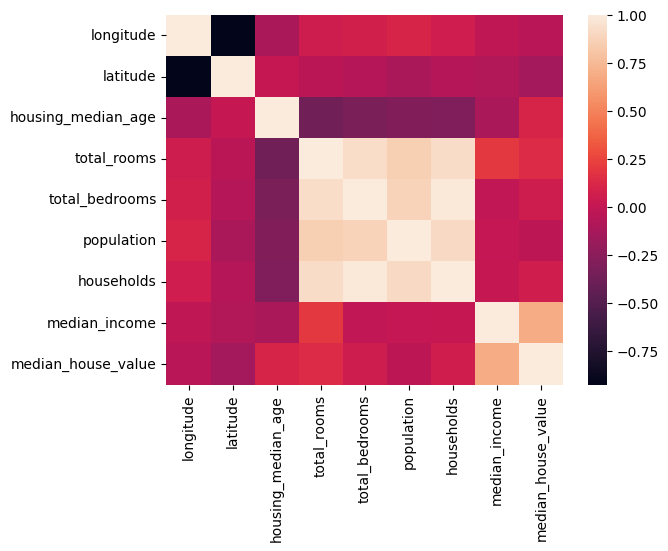

In [28]:
sns.heatmap(df.corr())

In [29]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [31]:
X = df.iloc[:,:-1]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
19995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
19996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
19997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
19998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [33]:
y = df.iloc[:,-1]
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
19995    225000.0
19996    237200.0
19997     62000.0
19998    162500.0
19999    500001.0
Name: median_house_value, Length: 20000, dtype: float64

In [38]:
sc = StandardScaler()

In [41]:
X = sc.fit_transform(X)
X

array([[ 2.62341796, -0.67260797, -1.0831221 , ..., -0.36299762,
        -0.07210901, -1.25165577],
       [ 2.54356006, -0.57429739, -0.76520547, ..., -0.26220367,
        -0.0956865 , -1.07989419],
       [ 2.49863999, -0.90668077, -0.92416378, ..., -0.96599304,
        -1.00211012, -1.16887974],
       ...,
       [-0.06679515,  0.31517926, -1.48051789, ..., -0.64769634,
        -0.73227881, -0.83282905],
       [ 1.22091354, -0.71474107,  0.90385686, ..., -1.21974624,
        -1.27194143, -0.31643922],
       [-0.03185731, -0.56493448,  1.06281518, ..., -0.59464689,
        -0.62748996,  2.46731925]])

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [65]:
type(y_test)

pandas.core.series.Series

In [50]:
xg_model = XGBRegressor()

In [51]:
xg_model.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
lr = LinearRegression()

In [53]:
lr_model = lr.fit(X_train , y_train)

In [66]:
xg_model.score(X_test , y_test)

0.830260411247474

In [67]:
lr_model.score(X_test , y_test)

0.6377114278189977